# Preprocessing:
- cleaning
- remove duplicates
- feature engineering
- transformation(encoding,scaling) etc>

- unclean data is messy(-structure issue) or dirty data(issue with content)
- what is dirty data?
- duplicated data
- missing data
- noisy data
- inaccurate/invalid data
- inconsistent data( always use the command  unique to find inconsistency in data)

- preprocessing is our second step
- step-1 framing the problem
- collect the data and the collected data is unclean/raw data
- step-2 to make a model, 60-70% time is invested in this step(preprocessing) **main step
- what we do in preprocessing?
-  we do data cleaning here
- step-3 to organize messy data
-  feature engineering
-  removal of/ handle outliers
- last step in step-3- transformation
- step-4 EDA(exploratory data analysis)
- model fitting (data science part)


- model evaluate, if something wrong then we go to preprocessing or step-2
- last step is deployment

In [43]:
## at the end data should be numeric

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
df1 = pd.DataFrame({"Age":[12,np.nan,14,np.nan,26,12,13,24,12,13],
                    "Height":[130,np.nan,133,143,123,np.nan,np.nan,np.nan,120,121],
                    "Gender":["m","f",np.nan,"m",np.nan,"f","m",np.nan,np.nan,"m"]})
df1



,Age,Height,Gender
0,12.0,130.0,m
1,NaN,NaN,f
2,14.0,133.0,NaN
3,NaN,143.0,m
4,26.0,123.0,NaN
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,NaN
8,12.0,120.0,NaN
9,13.0,121.0,m


## handling missing values : NaN, None, Nat

## how to detect the missing values
## detection
## command: isnull or isna()

In [46]:
df1.isnull()

,Age,Height,Gender
0,False,False,False
1,True,True,False
2,False,False,True
3,True,False,False
4,False,False,True
5,False,True,False
6,False,True,False
7,False,True,True
8,False,False,True
9,False,False,False


In [47]:
#df1.isna()

In [48]:
df1.isnull().sum() # column wise missing value

Age       2
Height    4
Gender    4
dtype: int64

In [49]:
df1.isnull().sum().sum() ## whole data missing value

10

In [50]:
df1["Age"].isnull().sum() ## particular column

2

In [51]:
df1[["Age","Gender"]].isnull().sum() ##more than one column

Age       2
Gender    4
dtype: int64

## handling missing values: delete(can only del whole row/col-use this only when 100% missing value are in row/column) or fill with some values

#### more than 70% values are nan then del, its not fixed, this depend on a company how theyare setting the bar or that col is relevant or not

### criteria is not fixed while deleting
### domain knowledge is most important in this step

### to fill missing values is called imputing
- how missing values will be filled?
- based on column type
- if col is numerictype
   - use mean, median , mode with arbitrary/constant value (as per domain knowledge)to fill the missing value
   - but we will use mean or median option to fill the missing values
   - if data has outliers, use median**
   - we will use mean at some place as per the domain knowledge
- if col is categorical
   - use mode to fill the missing values

## filling

## depends on col type-first check col type always

In [52]:
df1.dtypes

Age       float64
Height    float64
Gender     object
dtype: object

## outliers- extreme values
- it is a point that differs significantly 
- mean is fluctuating bcz of outliers
  - that's why we are using median(middle values) not mean
  - median is robust to outliers , that's mean its affecting median the least
- data should be sorted in case of medain
    - even obsevation-middle value(n)
    - odd obsevation- n/2,n/2+1(centre value) 

- mode can have more than one value, you can choose any value according to domain knowledge
- mean, median will always have one value


## detection of outliers

C:\Users\rupan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

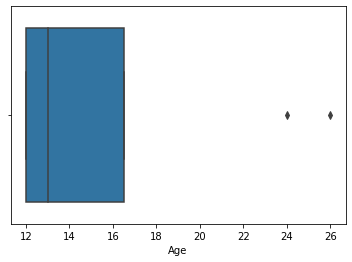

In [53]:
sns.boxplot(df1["Age"])      ## will do in matplot
## dots are outliers

In [54]:
df1["Age"].mean()

15.75

In [55]:
df1["Age"].median()

13.0

In [56]:
##data with outliers-we want to see effect on mean and median
df1 = pd.DataFrame({"Age":[12,np.nan,14,np.nan,26,12,13,24,12,13,200,400],
                    "Height":[130,np.nan,133,143,123,np.nan,np.nan,np.nan,120,121,122,123],
                    "Gender":["m","f",np.nan,"m",np.nan,"f","m",np.nan,np.nan,"m","m","m"]})
df1


,Age,Height,Gender
0,12.0,130.0,m
1,NaN,NaN,f
2,14.0,133.0,NaN
3,NaN,143.0,m
4,26.0,123.0,NaN
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,NaN
8,12.0,120.0,NaN
9,13.0,121.0,m


C:\Users\rupan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

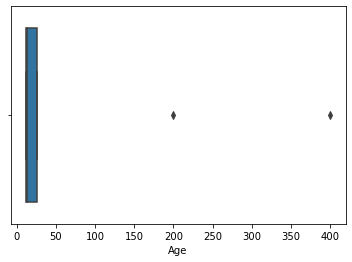

In [57]:
sns.boxplot(df1["Age"]) 

In [58]:
df1["Age"].mean()

72.6

In [59]:
s=df1["Age"].median()
s

13.5

In [60]:
#df1["Age"].fillna(s,inplace=True)
#df1

In [61]:
df1["Age"].fillna(df1["Age"].median(),inplace=True)
df1

,Age,Height,Gender
0,12.0,130.0,m
1,13.5,NaN,f
2,14.0,133.0,NaN
3,13.5,143.0,m
4,26.0,123.0,NaN
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,NaN
8,12.0,120.0,NaN
9,13.0,121.0,m


In [62]:
## to check its filled - isnull.sum

C:\Users\rupan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

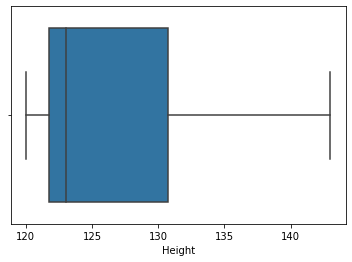

In [63]:
sns.boxplot(df1["Height"]) ##no outliers, use mean

In [64]:
df1["Height"].fillna(df1["Height"].mean(),inplace=True)
df1

,Age,Height,Gender
0,12.0,130.000,m
1,13.5,126.875,f
2,14.0,133.000,NaN
3,13.5,143.000,m
4,26.0,123.000,NaN
5,12.0,126.875,f
6,13.0,126.875,m
7,24.0,126.875,NaN
8,12.0,120.000,NaN
9,13.0,121.000,m


In [65]:
##gender is categorical, use mode
df1["Gender"].mode()

0    m
Name: Gender, dtype: object

In [71]:
df1["Gender"].fillna(df1["Gender"].mode()[0],inplace=True) #mode()[0] bcz we want index value only that's why we are doing slicing
df1

,Age,Height,Gender
0,12.0,130.000,m
1,13.5,126.875,f
2,14.0,133.000,m
3,13.5,143.000,m
4,26.0,123.000,m
5,12.0,126.875,f
6,13.0,126.875,m
7,24.0,126.875,m
8,12.0,120.000,m
9,13.0,121.000,m


In [72]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive\\Desktop\\upcoming-event.csv")
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Mackenzie Dern,Marina Rodriguez,-195,165,51.282051,165.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,500,400.0,100,2800.0,900,380.0
1,Randy Brown,Jared Gooden,-265,215,37.735849,215.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,200,550.0,400,1600.0,215,500.0
2,Tim Elliott,Matheus Nicolau,155,-180,155.000000,55.555556,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,240,120.0,800,450.0,1600,650.0
3,Sabina Mazo,Mariya Agapova,-190,160,52.631579,160.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,130,350.0,800,800.0,350,750.0
4,Chris Gutierrez,Felipe Colares,-235,190,42.553191,190.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,-110,400.0,1000,600.0,400,1200.0
5,Alexandr Romanov,Jared Vanderaa,-525,385,19.047619,385.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,450,1100.0,140,2200.0,165,700.0
6,Charles Rosa,Damon Jackson,165,-195,165.000000,51.282051,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,300,140.0,650,350.0,1100,700.0
7,Loopy Godinez,Silvana Gomez Juarez,-335,260,29.850746,260.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,-135,NaN,700,NaN,400,NaN
8,Steve Garcia,Charlie Ontiveros,-335,260,29.850746,260.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,400,650.0,800,1400.0,-135,650.0


In [73]:
#df.isnull().sum()

In [74]:
df.isnull().sum().sum()

300

In [75]:
df.shape

(9, 119)

In [76]:
#s=df.isnull().sum()
#s[0:10]

In [77]:
#df.isnull().sum()[0:50]

In [78]:
#for i in df.columns:
    #print(i,"------------",df[i].isnull().sum())

In [79]:
#for i in df.columns:
    #print(i,"---------",(df[i].isnull().sum()/df.shape[0])*100)

- delete those columns which has more than 70% missing values

In [80]:
for i in df.columns:
    if (df[i].isnull().sum()/df.shape[0])*100 >=70:
        df.drop(columns=[i],inplace=True)


In [81]:
df.shape

(9, 85)

In [82]:
#for i in df.columns:
    #print(i,"------------",df[i].isnull().sum())

In [83]:
# b_dec_odds, b_sub_odds, b_ko_odds

In [84]:
df["b_dec_odds"].dtype

dtype('float64')

In [85]:
df["b_sub_odds"].dtype

dtype('float64')

In [86]:
df["b_ko_odds"].dtype

dtype('float64')

In [1]:
'''df["b_dec_odds"].fillna(df["b_dec_odds"].median(),inplace=True)
df'''

'df["b_dec_odds"].fillna(df["b_dec_odds"].median(),inplace=True)\ndf'

In [2]:
'''df["b_sub_odds"].fillna(df["b_sub_odds"].median(),inplace=True)
df'''

'df["b_sub_odds"].fillna(df["b_sub_odds"].median(),inplace=True)\ndf'

In [3]:
'''df["b_ko_odds"].fillna(df["b_ko_odds"].median(),inplace=True)
df'''

'df["b_ko_odds"].fillna(df["b_ko_odds"].median(),inplace=True)\ndf'

In [95]:
df.isnull().sum().sum()

0

In [11]:
'''for i in df.columns:
    if (df[i].isnull().sum()/df.shape[0])*100 >=1:
        df[i].fillna(df[i].median(),inplace=True)
df'''
        

'for i in df.columns:\n    if (df[i].isnull().sum()/df.shape[0])*100 >=1:\n        df[i].fillna(df[i].median(),inplace=True)\ndf'

In [31]:
df.isnull().sum().sum()

0

# dropna: command

In [96]:
df=pd.DataFrame({"A":[1,2,np.nan,5],"B":[5,np.nan,np.nan,7],"C":[1,2,np.nan,9]})
df

,A,B,C
0,1.0,5.0,1.0
1,2.0,NaN,2.0
2,NaN,NaN,NaN
3,5.0,7.0,9.0


## dropna-to drop col/row of missing values 

In [97]:
df1=df.dropna(axis=1,how="any")  ##axis=1 is for column and how=any means if there is any missing value it will delete it
df1   ## all data was deleted bcz every column contains missing value

""
0
1
2
3


In [98]:
df1=df.dropna(axis=1,how="all")
df1 ## all means whole col should contain all the missing value but its not the case here

,A,B,C
0,1.0,5.0,1.0
1,2.0,NaN,2.0
2,NaN,NaN,NaN
3,5.0,7.0,9.0


In [99]:
df1=df.dropna(axis=0,how="all")
df1

,A,B,C
0,1.0,5.0,1.0
1,2.0,NaN,2.0
3,5.0,7.0,9.0


## removal of duplicants

In [105]:
employees=[('stuti',28,'varansi'),
          ('saumya',32,'delhi'),
          ('aadtiya',25,'mumbai'),
          ('saumya',32,'delhi'),
          ('saumya',32,'delhi'),
          ('saumya',32,'mumbai'),
          ('aadtiya',40,'dehradun'),
          ('seema',32,'delhi')]
df=pd.DataFrame(employees,columns=['Name','Age','City']) ##dataframe created from list of tuple
df

,Name,Age,City
0,stuti,28,varansi
1,saumya,32,delhi
2,aadtiya,25,mumbai
3,saumya,32,delhi
4,saumya,32,delhi
5,saumya,32,mumbai
6,aadtiya,40,dehradun
7,seema,32,delhi


#### whole row will be treated as a duplicant not column-wise entry

In [106]:
d=df.duplicated()  ##1st entry will be treated as unique after that they are duplicants
d

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [107]:
df[d] ##we want entries(not boolean),will do masking

,Name,Age,City
3,saumya,32,delhi
4,saumya,32,delhi


In [108]:
d=df.duplicated(keep="last")
d

0    False
1     True
2    False
3     True
4    False
5    False
6    False
7    False
dtype: bool

In [109]:
df[d]

,Name,Age,City
1,saumya,32,delhi
3,saumya,32,delhi


In [110]:
df=df.drop_duplicates()
df

,Name,Age,City
0,stuti,28,varansi
1,saumya,32,delhi
2,aadtiya,25,mumbai
5,saumya,32,mumbai
6,aadtiya,40,dehradun
7,seema,32,delhi


In [111]:
## subset- to see duplicates in more than one column

In [112]:
dup=df.duplicated(subset=["Name","Age"])
df[dup]

,Name,Age,City
5,saumya,32,mumbai


In [113]:
employees=[('stuti',28,'f',''),    
          ('saumya',32,'f',''),
          ('aadtiya',25,"",'m'),
          ('saumya',32,'fe',''),
          ('saumya',32,'fe',''),
          ('saumya',32,'f',''),
          ('aadtiya',40,"",'m'),
          ('seema',32,'f',"")]
df=pd.DataFrame(employees,columns=['Name','Age','isfemale',"ismale"]) ##dataframe created from list of tuple
df
#example of structural issue (bcz of two gender col that's not necessary), also an example of feature engineering(making col from existing col)

,Name,Age,isfemale,ismale
0,stuti,28,f,
1,saumya,32,f,
2,aadtiya,25,,m
3,saumya,32,fe,
4,saumya,32,fe,
5,saumya,32,f,
6,aadtiya,40,,m
7,seema,32,f,


In [114]:
df["isfemale"].unique() ##always use unique for inconsistent data

array(['f', '', 'fe'], dtype=object)

In [115]:
df["isfemale"]=df["isfemale"].replace("fe","f")
df["isfemale"]

0    f
1    f
2     
3    f
4    f
5    f
6     
7    f
Name: isfemale, dtype: object

In [116]:
df["isfemale"]=df["isfemale"].replace("","m")
df["isfemale"]

0    f
1    f
2    m
3    f
4    f
5    f
6    m
7    f
Name: isfemale, dtype: object

In [120]:
df.drop(columns=["ismale"],inplace=True)

In [121]:
df

,Name,Age,gender
0,stuti,28,f
1,saumya,32,f
2,aadtiya,25,m
3,saumya,32,f
4,saumya,32,f
5,saumya,32,f
6,aadtiya,40,m
7,seema,32,f


In [122]:
df.rename(columns={"isfemale":"gender"},inplace=True)

In [123]:
df

,Name,Age,gender
0,stuti,28,f
1,saumya,32,f
2,aadtiya,25,m
3,saumya,32,f
4,saumya,32,f
5,saumya,32,f
6,aadtiya,40,m
7,seema,32,f


## for pclass use unique, sibsp-tells sibling and spouse , parch=parent and children, embarked=connecting ports,use unique to check, deck= captain place
drop repeated column
(data.isnull().sum()/data.shape[0])*100

In [145]:
import seaborn as sns
import numpy as np
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [146]:
## structural issue, drop and clean

In [147]:
for i in data.columns:
    print(i,"------------",data[i].isnull().sum())

survived ------------ 0
pclass ------------ 0
sex ------------ 0
age ------------ 177
sibsp ------------ 0
parch ------------ 0
fare ------------ 0
embarked ------------ 2
class ------------ 0
who ------------ 0
adult_male ------------ 0
deck ------------ 688
embark_town ------------ 2
alive ------------ 0
alone ------------ 0


In [148]:
data.shape

(891, 15)

In [149]:
for i in data.columns:
    print(i,"---------",(data[i].isnull().sum()/data.shape[0])*100)

survived --------- 0.0
pclass --------- 0.0
sex --------- 0.0
age --------- 19.865319865319865
sibsp --------- 0.0
parch --------- 0.0
fare --------- 0.0
embarked --------- 0.22446689113355783
class --------- 0.0
who --------- 0.0
adult_male --------- 0.0
deck --------- 77.21661054994388
embark_town --------- 0.22446689113355783
alive --------- 0.0
alone --------- 0.0


In [150]:
#data

In [151]:
for i in data.columns:
    print(i,"-------",data[i].unique())

survived ------- [0 1]
pclass ------- [3 1 2]
sex ------- ['male' 'female']
age ------- [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp ------- [1 0 3 4 2 5 8]
parch ------- [0 1 2 5 3 4 6]
fare ------- [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475  

In [152]:
lis=["pclass","sex","embarked","adult_male","alive"]


In [153]:
data.drop(columns=lis,inplace=True)


In [154]:
data

,survived,age,sibsp,parch,fare,class,who,deck,embark_town,alone
0,0,22.0,1,0,7.2500,Third,man,NaN,Southampton,False
1,1,38.0,1,0,71.2833,First,woman,C,Cherbourg,False
2,1,26.0,0,0,7.9250,Third,woman,NaN,Southampton,True
3,1,35.0,1,0,53.1000,First,woman,C,Southampton,False
4,0,35.0,0,0,8.0500,Third,man,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,Second,man,NaN,Southampton,True
887,1,19.0,0,0,30.0000,First,woman,B,Southampton,True
888,0,NaN,1,2,23.4500,Third,woman,NaN,Southampton,False
889,1,26.0,0,0,30.0000,First,man,C,Cherbourg,True


In [155]:
for i in data.columns:
    if (data[i].isnull().sum()/data.shape[0])*100 >=70:
        data.drop(columns=[i],inplace=True)


In [156]:
data

,survived,age,sibsp,parch,fare,class,who,embark_town,alone
0,0,22.0,1,0,7.2500,Third,man,Southampton,False
1,1,38.0,1,0,71.2833,First,woman,Cherbourg,False
2,1,26.0,0,0,7.9250,Third,woman,Southampton,True
3,1,35.0,1,0,53.1000,First,woman,Southampton,False
4,0,35.0,0,0,8.0500,Third,man,Southampton,True
...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,Second,man,Southampton,True
887,1,19.0,0,0,30.0000,First,woman,Southampton,True
888,0,NaN,1,2,23.4500,Third,woman,Southampton,False
889,1,26.0,0,0,30.0000,First,man,Cherbourg,True


In [158]:
for i in data.columns:
    print(i,"------",data[i].isnull().sum())

survived ------ 0
age ------ 177
sibsp ------ 0
parch ------ 0
fare ------ 0
class ------ 0
who ------ 0
embark_town ------ 2
alone ------ 0


In [159]:
data[["age","embark_town"]].dtypes

age            float64
embark_town     object
dtype: object

In [160]:
'''#to take multiple types of data
numeric=["float","int"] #list
k1=df.select_dtypes(include=numeric)
#k1'''

'#to take multiple types of data\nnumeric=["float","int"] #list\nk1=df.select_dtypes(include=numeric)\n#k1'

In [161]:
#k2=df.select_dtypes(include="object").columns
#k2

C:\Users\rupan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

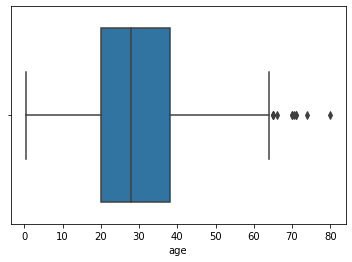

In [162]:
sns.boxplot(data["age"])

In [163]:
data["age"].fillna(data["age"].median(),inplace=True)
print(data)
print(data["age"].isnull().sum())

     survived   age  sibsp  parch     fare   class    who  embark_town  alone
0           0  22.0      1      0   7.2500   Third    man  Southampton  False
1           1  38.0      1      0  71.2833   First  woman    Cherbourg  False
2           1  26.0      0      0   7.9250   Third  woman  Southampton   True
3           1  35.0      1      0  53.1000   First  woman  Southampton  False
4           0  35.0      0      0   8.0500   Third    man  Southampton   True
..        ...   ...    ...    ...      ...     ...    ...          ...    ...
886         0  27.0      0      0  13.0000  Second    man  Southampton   True
887         1  19.0      0      0  30.0000   First  woman  Southampton   True
888         0  28.0      1      2  23.4500   Third  woman  Southampton  False
889         1  26.0      0      0  30.0000   First    man    Cherbourg   True
890         0  32.0      0      0   7.7500   Third    man   Queenstown   True

[891 rows x 9 columns]
0


In [164]:
data["embark_town"].fillna(data["embark_town"].mode()[0],inplace=True)
print(data)
print(data["embark_town"].isnull().sum())

     survived   age  sibsp  parch     fare   class    who  embark_town  alone
0           0  22.0      1      0   7.2500   Third    man  Southampton  False
1           1  38.0      1      0  71.2833   First  woman    Cherbourg  False
2           1  26.0      0      0   7.9250   Third  woman  Southampton   True
3           1  35.0      1      0  53.1000   First  woman  Southampton  False
4           0  35.0      0      0   8.0500   Third    man  Southampton   True
..        ...   ...    ...    ...      ...     ...    ...          ...    ...
886         0  27.0      0      0  13.0000  Second    man  Southampton   True
887         1  19.0      0      0  30.0000   First  woman  Southampton   True
888         0  28.0      1      2  23.4500   Third  woman  Southampton  False
889         1  26.0      0      0  30.0000   First    man    Cherbourg   True
890         0  32.0      0      0   7.7500   Third    man   Queenstown   True

[891 rows x 9 columns]
0


In [165]:
for i in data.columns:
    print(i,"-------",data[i].isnull().sum())

survived ------- 0
age ------- 0
sibsp ------- 0
parch ------- 0
fare ------- 0
class ------- 0
who ------- 0
embark_town ------- 0
alone ------- 0
